In [2]:
import cv2
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
from PIL import Image
from PIL import ImageFilter
from matplotlib import animation
from PIL import ImageEnhance

from tkinter import filedialog
import tkinter as tk

import pickle

from os import sys

import matplotlib.pyplot as plt
import argparse

from statistics import mean
import os

%matplotlib inline

# for loading array 
from scipy.interpolate import interp1d
from scipy.io import loadmat
from scipy import signal as sig
import pandas as pd
import numpy as np
from scipy.signal import filtfilt, butter



sys.path.append(r'C:\Users\Nicolas\Documents\GitHub\WorkScripts')

from LibrairieNico.HitsFctClass import smooth, Easyinterp, diff, calculateNewSize


def FindReferenceSystem2(video_path):
    
    HandleBEHAV = cv2.VideoCapture(video_path, 0)
    length = int(HandleBEHAV.get(cv2.CAP_PROP_FRAME_COUNT))
    
    _ , IMG1 = HandleBEHAV.read()

    linemask2= IMG1[601:602, : , 0]

    linemask2 = np.invert(linemask2)
    linemask2 = linemask2.flatten()

    smoothmask = smooth(linemask2)

    b, a = butter(8, 0.075)
    smoothfiltered = filtfilt(b, a, smoothmask)

    diffmask = np.diff(smoothfiltered,n=1)

    PeaksNO2 , values = sig.find_peaks(diffmask, height = 0.01)

    list1 = []

    if np.size(PeaksNO2) > 1: 

        var_Peaks = 1
        height = 0.01
        TakenHeight = []
        
        while np.size(PeaksNO2) > var_Peaks :
            height = height +0.01
            PeaksNO2_2 , values = sig.find_peaks(diffmask, height)
            
            if np.size(PeaksNO2_2) == 1:
                list1.append(PeaksNO2_2)
                TakenHeight.append(height)
                break
                
    Treshold = (TakenHeight[0])
    Peaks3 = ((list1 [0])  - 15)
    Peaks4 = ((list1 [0])  + 15)
    
    return [Peaks3,Peaks4,Treshold]

    


C:\ProgramData\Anaconda3\envs\ArduinoComs\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


[array([1251], dtype=int64), array([1281], dtype=int64), 0.9300000000000006]
0.9300000000000006
[290 339]
[]
[200]
[]
[450]
[]
[]
[431]
[199]
[344]
[]
[]
[433]
[438]
[]
[]
[262]
[203 316 421 569]
[]
[224]
[]
[]
[]
[342]
[433]
[146 198]
[]
[471 572 638]
[278 364]
[]
[439]
[]
[190 438]
[119 553]
[]
[190 451]
[]
[374]
[]
[]
[119 329 466]
[202]
[]
[554]
[]
[315]
[]
[]
[21 77]
[]
[196]
[348]
[437]
[553]
[]
[]
[472]
[]
[ 22  76 341]
[333 495]
[268 361]
[315]
[]
[328]
[ 24  74 174 314]
[278]
[]
[]
[318]
[338 558]
[]
[202 431]
[]
[]
[]
[]
[]
[]
[]
[352]
[497]
[]
[]
[454]
[197 438]
[228 355 632]
[]
[545]
[]
[439]
[]
[345]
[ 3 97]
[]
[301 445]
[]
[291 526]
[]
[]
[177]
[203]
[]
[]
[]
[]
[]
[]
[ 22  76 318]
[]
[]
[551]
[]
[388]
[]
[]
[200]
[317 441]
[]
[203]
[]
[27 71]
[327]
[315]
[419]
[443]
[]
[196]
[420]
[]
[306]
[148]
[]
[435]
[]
[]
[315 454]
[]
[362]
[233 416]
[]
[205]
[455]
[]
[]
[204]
[]
[291 462]
[]
[179 327]
[184]
[]
[]
[349]
[429]
[450]
[323]
[]
[]
[436]
[442]
[]
[]
[]
[]
[319]
[]
[]
[]


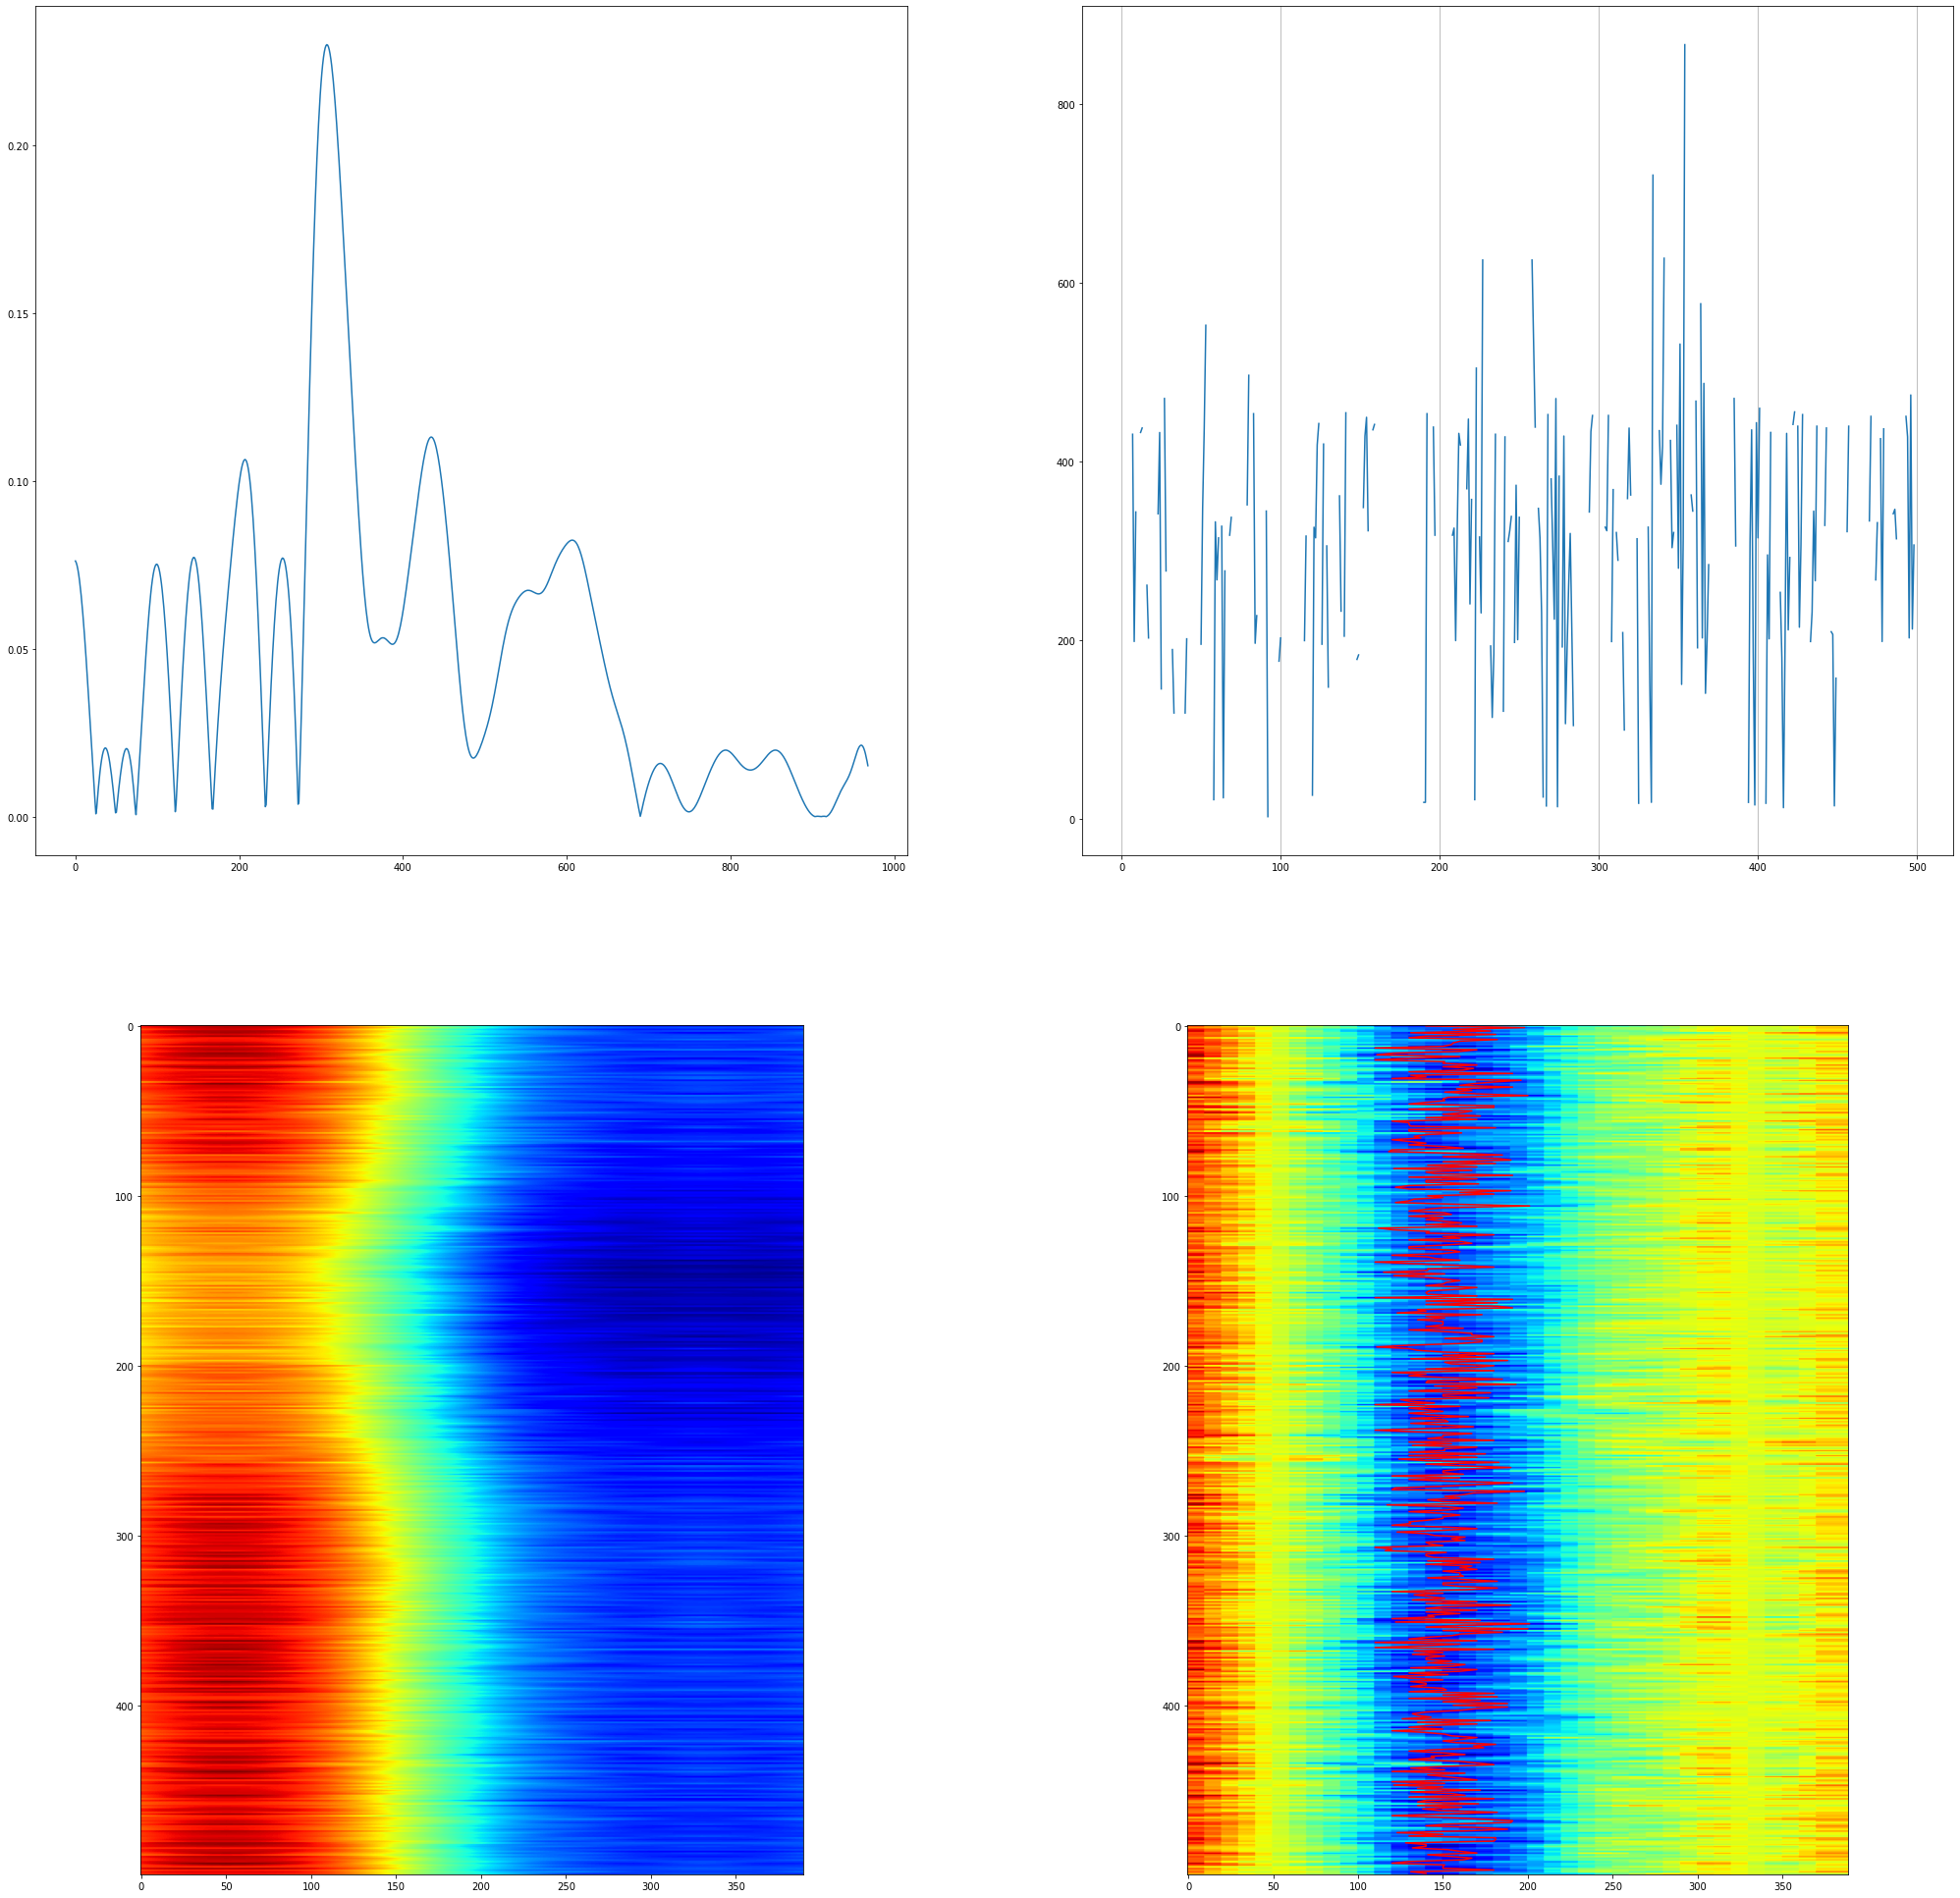

In [5]:
video_path = r"C:\Users\Nicolas\Desktop\Test_Hit\Mouse25_2020-02-07T11.15.32.avi"

HandleBEHAV = cv2.VideoCapture(video_path, 0)


length = int(HandleBEHAV.get(cv2.CAP_PROP_FRAME_COUNT))


_ , IMG1 = HandleBEHAV.read()


Check = IMG1[600:601, : , 0]


#2eme objet
ListObj3 = []


#2eme objet
Reference_peaks2 = FindReferenceSystem2(video_path)

print(Reference_peaks2)
print(Reference_peaks2[2])

#####2eme objet#####

for framne_nb in range(length-1) :


    _ , IMG1 = HandleBEHAV.read()
    
    Check = np.vstack((Check , IMG1[601:602, : , 0]))

    linemask = IMG1[601:602, int(Reference_peaks2[0]):int(Reference_peaks2[1])]

    lineIMG = linemask.copy()
    
    linemask3 = linemask.flatten()
    
    smoothmask = smooth(linemask3)
    
    X = np.arange(0,np.size(smoothmask),1)
    Xinterp = np.arange(0,np.size(smoothmask),0.1)
    f2 = interp1d(X, abs(smoothmask), kind='slinear', fill_value="extrapolate")
    
    raw_interp = f2(Xinterp)
    
    interpol_img = np.reshape(raw_interp,(1, np.shape(raw_interp)[0]))
    interpol_img = np.vstack((interpol_img,interpol_img,interpol_img,interpol_img,interpol_img,interpol_img,interpol_img,interpol_img,interpol_img,interpol_img))

    b, a = butter(8, 0.075)
    smoothfiltered = filtfilt(b, a, raw_interp)

    diffmask = np.diff(smoothfiltered,n=1)
    
    DPeaks , values = sig.find_peaks(abs(diffmask), height =0.15)
    
    print(DPeaks)
    
    if np.size(DPeaks) > 0:
        ListObj3.append(DPeaks[0])
            
    else :
       
        ListObj3.append(np.nan)
    
    


print(DPeaks)
print(ListObj3)




SD = np.nanstd(ListObj3)
MeanPeaks = np.nanmean(ListObj3)





        
LineFrame = Check[ 0:np.shape(Check)[0] , int(Reference_peaks2[0]):int(Reference_peaks2[1])]
        
#print(np.shape(LineFrame))

Modif = smooth(LineFrame[0,:])

InterpFrame = Easyinterp(Modif)

DiffFrame = np.diff(abs(InterpFrame), n=1)

listmax = [ np.argmin(DiffFrame) ]


for I in range(1,np.shape(LineFrame)[0],1):
    
    Modif = np.vstack( ( Modif, smooth(LineFrame[I,:]) ) )
    InterpFrame = np.vstack( ( InterpFrame , Easyinterp(Modif[I,:] ) ) )
    DiffFrame = np.vstack ( ( DiffFrame , diff(InterpFrame[I,:] ) ) )
    
    listmax.append(np.argmin(DiffFrame[I,:]))
    
    
    
    
    
    
        
    

        






fig = plt.figure(figsize = (35,35))

#print(listmax)
#print(np.shape(Check))
        
        




plt.subplot(221), plt.plot(abs(diffmask))

#plt.subplot(222), plt.plot(abs(smooth(np.asarray(ListObj1)-MeanPeaks)))

plt.subplot(222), plt.plot(ListObj3)
#plt.subplot(222), plt.plot(smoothmask)
#plt.subplot(222), plt.plot(smoothmask)

#plt.xticks(range(0, 540, 20))
#plt.yticks(range(200, 500, 30))
plt.grid(axis="x")



 #plt.subplot(223), plt.imshow(Check, 'jet')

#plt.scatter( int(Reference_peaks2[0]) , 20, s = 1, c = 'red')
#plt.scatter( int(Reference_peaks2[1]) , 20, s = 1,  c = 'red')

#plt.plot( [int(Reference_peaks2[0]),int(Reference_peaks2[0])] , [0,np.shape(Check)[0]], linewidth = 1,  c = 'red')
#plt.plot( [int(Reference_peaks2[1]),int(Reference_peaks2[1])] , [0,np.shape(Check)[0]], linewidth = 1,  c = 'red')

#plt.subplot(224), plt.imshow(Check[   int(Reference_peaks2[1]):int(Reference_peaks2[0])    ,   0:np.shape(Check)[0]   ] , 'jet')
#plt.subplot(224), plt.imshow(Check[ 0:np.shape(Check)[0] , int(Reference_peaks2[1]):int(Reference_peaks2[0])] , 'jet')

plt.subplot(223), plt.imshow(InterpFrame , 'jet')


#plt.subplot(223), plt.imshow(lineIMG, 'gray')


plt.subplot(224), plt.imshow(DiffFrame, 'jet')
plt.plot(listmax,np.arange(0,np.shape(LineFrame)[0],1),'red')


#plt.subplot(224), plt.plot(Listframe2, Listpeaks2, 'o')
#plt.subplot(224), plt.plot(raw_interp)

#plt.xticks(range(0, 500, 20))
#plt.yticks(range(200, 700, 10))

        
        
        
        
        
#fig = plt.figure(figsize = (25,35)

#plt.subplot(221), plt.plot(smoothmask)

#plt.subplot(222), plt.plot(smoothfiltered)

#plt.subplot(223), plt.plot(abs(diffmask))

#plt.subplot(224), plt.imshow(lineIMG, 'gray')

#plt.subplot(224), plt.plot(interpolatedmask)

#plt.subplot(223), plt.imshow(lineIMG, 'gray')

#plt.subplot(224), plt.plot(Listframe, Listpeaks, 'o')